# Descriptive Statistics For "CVE Details" Site

## Parts of the work
### 1) run script scrapProducts.py for scraping products  for each year in the range 1999-2019. This script creates many xslx-files (1999_31_5.xlsx, 1999_36_23.xlsx, ... ) for each products: 

    Number	Product		     Product ID	Vendor ID
    1	Debian Linux Debian      36	    23
    2	Linux Kernel Linux	     47	    33
    4	Mac Os X Apple	         156	49
    8	Ubuntu Linux Canonical	 20550	4781
    12	Windows 7 Microsoft	     17153	26
    15	Opensuse Opensuse	     14195	8184
    17	Windows Vista Microsoft	 9591	26
    22	Windows 10 Microsoft	 32238	26
    23	Windows Xp Microsoft	 739	26
    25	Windows 8.1 Microsoft	 26434	26
    28	Mac Os X Server Apple	 2274	49
    34	Enterprise Linux Redhat	 78	    25
    43	Windows 2000 Microsoft	 107	26
    48	Solaris	SUN	             31	    5

 ### 2) run script createGeneralDF.py. This script creates All_Data_for_Analysis.xlsx from xslx-files (1999_31_5.xlsx, 1999_36_23.xlsx, ... ).
 ### 3) run this jupyter notebook for the analysis. The file All_Data_for_Analysis.xlsx from previous step is input file.
 ### 4) the script userDialog.py produces 1 ouput file for the single product_id, vendor_id, year. For example, this is user dialog during the script running:

    Please enter the year: 2008
    Please enter product_id: 156
    Please enter vender_id: 49
    The file 2008_156_49.xlsx has created
    >>
    
  #### This script gives opportunity to add the new file before combine all xlsx-files to All_Data_for_Analysis.xlsx.

## Import modules

In [39]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Read data and create dataframe 

In [62]:
all=pd.read_excel('All_Data_for_Analysis.xlsx', "CVE Details")
print(len(all.index))

13888


## Descriptive Statistics

In [41]:
all.head()

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
0,CVE-1999-0914,1999-01-03,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Overflow,\tBuffer overflow in the FTP client in the Deb...,1999_36_23.xlsx,36_23,3538,high,1999
1,CVE-1999-0389,1999-01-03,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Overflow,\tBuffer overflow in the bootp server in the D...,1999_36_23.xlsx,36_23,3538,high,1999
2,CVE-1999-0678,1999-01-17,2008-09-09,OS,Debian,Debian Linux,4.0,5.0,Partial,None,...,Low,Not required,None,NaN,\tA default configuration of Apache on Debian ...,1999_36_23.xlsx,36_23,3524,medium,1999
3,CVE-1999-0457,1999-01-17,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Gain privileges,\tLinux ftpwatch program allows local users to...,1999_36_23.xlsx,36_23,3524,high,1999
4,CVE-1999-0373,1999-02-01,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Execute CodeOverflow,"\tBuffer overflow in the ""Super"" utility in De...",1999_36_23.xlsx,36_23,3509,high,1999


In [42]:
all.tail()

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
13883,CVE-2018-19208,2018-11-12,2018-12-13,OS,Suse,Suse Linux Enterprise Server,11,4.3,None,None,...,Medium,Not required,None,Denial Of Service,"\tIn libwpd 0.10.2, there is a NULL pointer de...",2018_78_25.xlsx,78_25,31,medium,2018
13884,CVE-2018-19214,2018-11-12,2018-12-13,OS,Redhat,Enterprise Linux,7.0,6.8,Partial,Partial,...,Medium,Not required,None,NaN,\tNetwide Assembler (NASM) 2.14rc15 has a heap...,2018_78_25.xlsx,78_25,31,medium,2018
13885,CVE-2018-19215,2018-11-12,2018-12-13,OS,Redhat,Enterprise Linux,7.0,6.8,Partial,Partial,...,Medium,Not required,None,NaN,\tNetwide Assembler (NASM) 2.14rc16 has a heap...,2018_78_25.xlsx,78_25,31,medium,2018
13886,CVE-2018-16850,2018-11-13,2018-12-18,OS,Redhat,Enterprise Linux,7.6,7.5,Partial,Partial,...,Low,Not required,None,Sql Injection,"\tpostgresql before versions 11.1, 10.6 is vul...",2018_78_25.xlsx,78_25,35,high,2018
13887,CVE-2018-19478,2019-01-02,2019-01-11,OS,Debian,Debian Linux,8,4.3,None,None,...,Medium,Not required,None,NaN,"\tIn Artifex Ghostscript before 9.26, a carefu...",2019_36_23.xlsx,36_23,9,medium,2019


In [43]:
# summary statistics of character columns only
all.describe(include=['object'])

,CVE ID Number,Software Type,Vendor,Product,Version,Confidentiality Impact,Integrity Impact,Availibility Impact,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,score level
count,13888,13888,13888,13888,10536,13888,13888,13888,13888,13888,13888,11787,13888,13888,13888,13888
unique,9604,3,335,522,1332,3,3,3,3,3,3,91,9442,191,14,3
top,CVE-2015-1819,OS,Microsoft,Linux Kernel,-,Partial,None,Complete,Low,Not required,None,Denial Of Service,\tRace condition in win32k.sys in the kernel-m...,2018_20550_4781.xlsx,47_33,medium
freq,5,11824,4623,2058,794,5009,5202,6116,7799,13170,12331,2467,84,484,2158,6227


In [44]:
# summary statistics of all columns 
all.describe(include='all')

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
count,13888,13888,13888,13888,13888,13888,10536,13888.000000,13888,13888,...,13888,13888,13888,11787,13888,13888,13888,13888.000000,13888,13888.000000
unique,9604,2030,750,3,335,522,1332,NaN,3,3,...,3,3,3,91,9442,191,14,NaN,3,NaN
top,CVE-2015-1819,2017-03-16 00:00:00,2018-10-30 00:00:00,OS,Microsoft,Linux Kernel,-,NaN,Partial,None,...,Low,Not required,None,Denial Of Service,\tRace condition in win32k.sys in the kernel-m...,2018_20550_4781.xlsx,47_33,NaN,medium,NaN
freq,5,189,2672,11824,4623,2058,794,NaN,5009,5202,...,7799,13170,12331,2467,84,484,2158,NaN,6227,NaN
first,NaN,1999-01-01 00:00:00,2008-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-01-02 00:00:00,2019-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.095536,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580.664099,NaN,2012.703413
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.231697,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675.213523,NaN,4.683774
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1999.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.600000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.000000,NaN,2009.000000


In [45]:
all['score level'].describe()

count      13888
unique         3
top       medium
freq        6227
Name: score level, dtype: object

In [46]:
all['days'].describe()

count    13888.000000
mean      1580.664099
std       1675.213523
min          0.000000
25%        153.000000
50%        948.000000
75%       2758.000000
max       7237.000000
Name: days, dtype: float64

In [47]:
#List unique values in the df['Vendo'] column
all.Vendor.unique()

array(['Debian', 'Washington University', 'Suse', 'Linux', 'Todd Miller',
       'Earl Hood', 'Redhat', 'SGI', 'Paul Kranenburg', 'Apple',
       'Microsoft', 'SUN', 'Turbolinux', 'Freebsd', 'Trustix',
       'Slackware', 'Sam Lantinga', 'Mandrakesoft', 'Zope', 'Proftpd',
       'Progeny', 'University Of Cambridge', 'Immunix', 'John Bovey',
       'Oracle', 'Netbsd', 'Easy Software Products', 'Winzip',
       'Xi Graphics', 'Xfree86 Project', 'Sendmail', 'Michael Jennings',
       'Semi', 'Openpkg', 'Openbsd', 'Xpdf', 'Windriver', 'FTE', 'Perl',
       'Gallery Project', 'William Deich', 'Webmin', 'Mysql', 'Pavuk',
       'SUP', 'Mailreader.com', 'Roaring Penguin', 'Samba', 'Ubuntu',
       'Openldap', 'Vmware', 'Wxgtk2', 'Nortel', 'SOX', 'Tinysofa',
       'Dgen', 'Viewcvs', 'ZGV', 'SCO', 'Gentoo', 'Zinf', 'Squid-cache',
       'Sukria', 'Mantis', 'GNU', 'Vserver', 'Opendarwin',
       'Perry Kiehtreiber', 'Yamaha', 'Sylpheed-claws', 'Rob Flynn',
       'Wietse Venema', 'Mozilla', 'Op

In [1]:
import ipywidgets as widgets

prod = widgets.Dropdown(options=['47_33', '78_25'], value='47_33', disabled=False)
prod

In [63]:
prod.value

'78_25'

In [64]:
df=all[all.product_vender==prod.value]
df.head()

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
374,CVE-2002-1323,2002-12-11,2018-10-30,OS,SUN,Sunos,5.8,4.6,Partial,Partial,...,Low,Not required,User,NaN,"\tSafe.pm 2.0.7 and earlier, when used in Perl...",2002_78_25.xlsx,78_25,5803,medium,2002
375,CVE-2002-2185,2002-12-31,2018-10-19,OS,Suse,Suse Linux,8,4.9,None,None,...,Low,Not required,None,Denial Of Service,\tThe Internet Group Management Protocol (IGMP...,2002_78_25.xlsx,78_25,5772,medium,2002
540,CVE-2003-0434,2003-07-24,2017-10-10,Application,Xpdf,Xpdf,1.1,7.5,Partial,Partial,...,Low,Not required,User,Execute Code,\tVarious PDF viewers including (1) Adobe Acro...,2003_78_25.xlsx,78_25,5193,high,2003
541,CVE-2003-0699,2003-08-27,2017-10-10,OS,Redhat,Linux Advanced Workstation,2.1,7.5,Partial,Partial,...,Low,Not required,User,NaN,\tThe C-Media PCI sound driver in Linux before...,2003_78_25.xlsx,78_25,5159,high,2003
542,CVE-2003-0549,2003-08-27,2017-10-10,OS,Redhat,Linux Advanced Workstation,2.1,5.0,None,None,...,Low,Not required,None,Denial Of Service,\tThe X Display Manager Control Protocol (XDMC...,2003_78_25.xlsx,78_25,5159,medium,2003


In [65]:
df.tail()

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
13882,CVE-2018-19115,2018-11-08,2019-01-08,OS,Redhat,Enterprise Linux Workstation,7.0,7.5,Partial,Partial,...,Low,Not required,None,Overflow,\tkeepalived before 2.0.7 has a heap-based buf...,2018_78_25.xlsx,78_25,62,high,2018
13883,CVE-2018-19208,2018-11-12,2018-12-13,OS,Suse,Suse Linux Enterprise Server,11,4.3,None,None,...,Medium,Not required,None,Denial Of Service,"\tIn libwpd 0.10.2, there is a NULL pointer de...",2018_78_25.xlsx,78_25,31,medium,2018
13884,CVE-2018-19214,2018-11-12,2018-12-13,OS,Redhat,Enterprise Linux,7.0,6.8,Partial,Partial,...,Medium,Not required,None,NaN,\tNetwide Assembler (NASM) 2.14rc15 has a heap...,2018_78_25.xlsx,78_25,31,medium,2018
13885,CVE-2018-19215,2018-11-12,2018-12-13,OS,Redhat,Enterprise Linux,7.0,6.8,Partial,Partial,...,Medium,Not required,None,NaN,\tNetwide Assembler (NASM) 2.14rc16 has a heap...,2018_78_25.xlsx,78_25,31,medium,2018
13886,CVE-2018-16850,2018-11-13,2018-12-18,OS,Redhat,Enterprise Linux,7.6,7.5,Partial,Partial,...,Low,Not required,None,Sql Injection,"\tpostgresql before versions 11.1, 10.6 is vul...",2018_78_25.xlsx,78_25,35,high,2018


## Plots

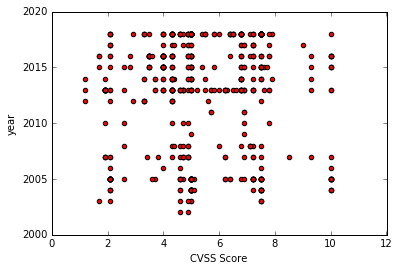

In [66]:
df.plot(kind='scatter',x='CVSS Score',y='year',color='red')

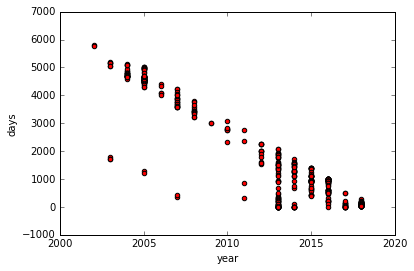

In [67]:
df.plot(kind='scatter',x='year',y='days',color='red')

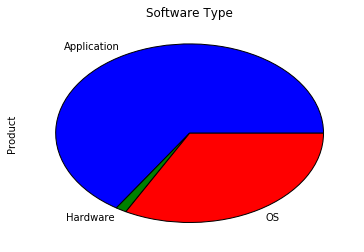

In [68]:
df.groupby('Software Type')['Product'].nunique().plot(kind='pie')
plt.title('Software Type')

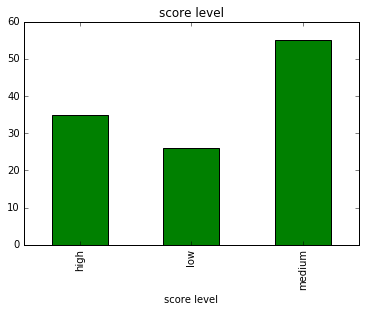

In [69]:
df.groupby('score level')['Product'].nunique().plot(kind='bar',color='green')
plt.title('score level')

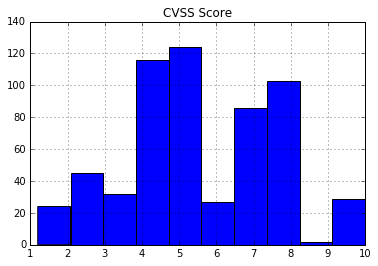

In [70]:
df['CVSS Score'].hist()
plt.title('CVSS Score')

In [71]:
df['Vendor'].nunique()

38

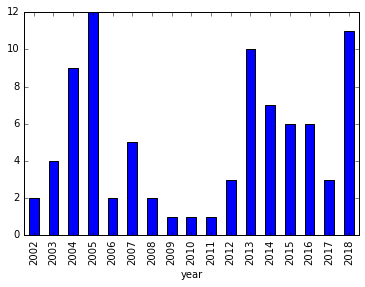

In [72]:
df.groupby('year')['Vendor'].nunique().plot(kind='bar')

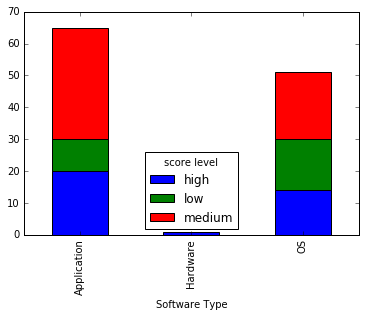

In [73]:
df.groupby(['Software Type', 'score level'])['Product'].nunique().unstack().plot(kind='bar',stacked=True)

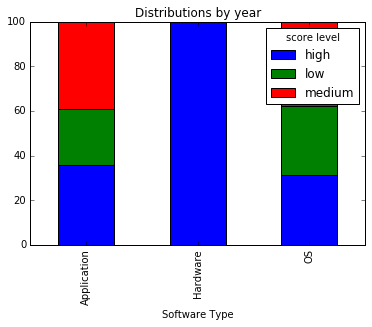

In [74]:
#the distributions, not raw amounts
df.groupby(['Software Type','score level'])['year'].nunique().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Distributions by year')

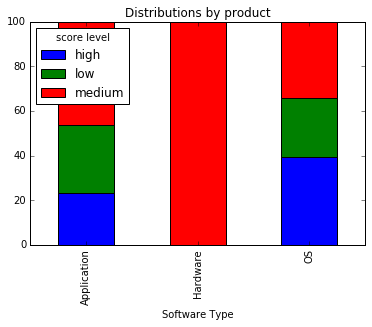

In [61]:
#the distributions, not raw amounts
df.groupby(['Software Type','score level'])['Vendor'].nunique().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Distributions by product')